# Analysis for Earth's Lightning Hotspots

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker


import sys
import os
import warnings



import pathlib
import h5py

import seaborn as sns

In [2]:
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap

In [3]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

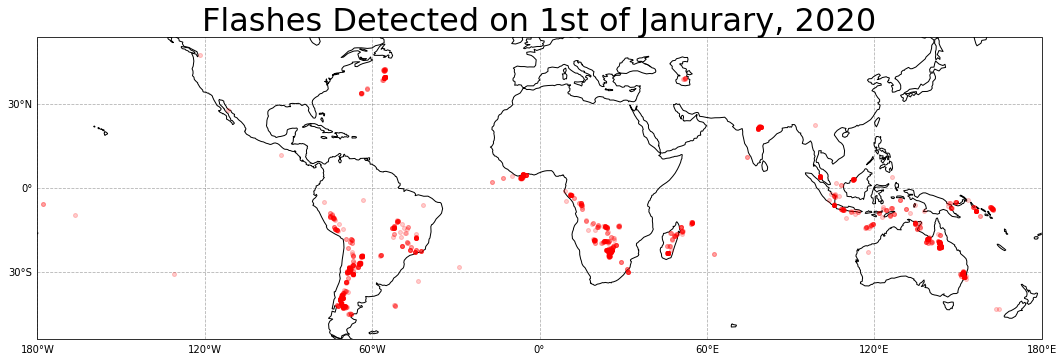

In [4]:
#partly from
#https://ghrc.nsstc.nasa.gov/home/data-recipes/iss-lis-lightning-flash-location-quickview-using-python-30-and-gis

warnings.filterwarnings("ignore")
path = "E:/_ELTE_PHYS_MSC/3_third_semester/datascience/data/hdf5/test/"
f1 = ["ISS_LIS_SC_V1.0_20200101_NQC_17019.h5",
     "ISS_LIS_SC_V1.0_20200101_NQC_17020.h5",
     "ISS_LIS_SC_V1.0_20200101_NQC_17021.h5",
     "ISS_LIS_SC_V1.0_20200101_NQC_17022.h5",
     "ISS_LIS_SC_V1.0_20200101_NQC_17023.h5",
     "ISS_LIS_SC_V1.0_20200101_NQC_17024.h5",
     "ISS_LIS_SC_V1.0_20200101_NQC_17025.h5",
     "ISS_LIS_SC_V1.0_20200101_NQC_17026.h5",
     "ISS_LIS_SC_V1.0_20200101_NQC_17027.h5",
     "ISS_LIS_SC_V1.0_20200101_NQC_17028.h5",
     "ISS_LIS_SC_V1.0_20200101_NQC_17029.h5",
     "ISS_LIS_SC_V1.0_20200101_NQC_17030.h5",
     "ISS_LIS_SC_V1.0_20200101_NQC_17031.h5",
     "ISS_LIS_SC_V1.0_20200101_NQC_17032.h5",
     "ISS_LIS_SC_V1.0_20200101_NQC_17033.h5",
     "ISS_LIS_SC_V1.0_20200101_NQC_17034.h5"]


plt.figure(figsize=(18,12))


map = plt.axes(projection=ccrs.PlateCarree(central_longitude=0.0))
gl = map.gridlines(crs=ccrs.PlateCarree(central_longitude=0.0), draw_labels=True, linewidth=0.8,alpha=0.3,color="black",linestyle="--")

gl.ylocator = mticker.FixedLocator([-90,-60,-30,0,30,60,90])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_top=False
gl.ylabels_right=False


for i in range(len(f1)):
    file = h5py.File(path+f1[i], 'r')
    s_set = file['orbit']['point']['lightning']['flash']
    s_set_l = np.array([list(elem) for elem in s_set])
    file.close()
    if(len(s_set_l) != 0):
        plt.plot(np.vstack(s_set_l[:,3])[:,1],
                 np.vstack(s_set_l[:,3])[:,0],
                 " ro",
                 markersize=4,
                 alpha=0.2)
        
map.coastlines(color="black")

plt.xlabel("Longitude [°]",fontsize=28)
plt.ylabel("Latitude [°]",fontsize=28)

plt.xlim(-180,180)
plt.ylim(-54,54)

plt.title("Flashes Detected on 1st of Janurary, 2020", fontsize=32)

plt.show()


## Heatmap

At this point we see how to handle these files, so we shall proceed to making the simplified output, which only contains the times of the flashes and the longitude and latitude of the flashes. This was done in a separate Jupyter Notebook, which output the simplified.csv, which can be loaded into pandas

In [5]:
#loading
col_names = ["time","long","lat"]
simplified_data = pd.read_csv("../data/simplified/simplified.csv", skiprows=4, delimiter=" ", names=col_names)
print(simplified_data.info(), simplified_data.values.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798991 entries, 0 to 798990
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    798991 non-null  float64
 1   long    798991 non-null  float64
 2   lat     798991 non-null  float64
dtypes: float64(3)
memory usage: 18.3 MB
None (798991, 3)


In [6]:
#numpy.histogram2d(x, y, bins=10, range=None, normed=None, weights=None, density=None)
#one monitor hell
xedges_0 = np.arange(-180,181)
yedges_0 = np.arange(-54,55)

xedges_1 = np.linspace(-180,180,int(12742/6/2)+1)
yedges_1 = np.linspace(-54,54,int(12742/6/2 * (54/180))+1)


HIST2D, x_edges, y_edges = np.histogram2d(simplified_data["long"].values,simplified_data["lat"].values,
                                         bins=(xedges_1,yedges_1))
HIST2D = HIST2D.T

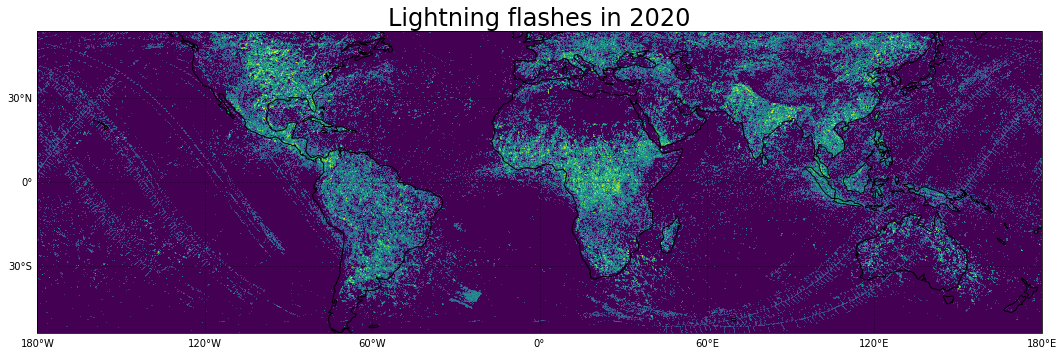

In [7]:
fig = plt.figure(figsize=(18,10))

map = plt.axes(projection=ccrs.PlateCarree(central_longitude=0.0))
gl = map.gridlines(crs=ccrs.PlateCarree(central_longitude=0.0),
                   draw_labels=True,
                   linewidth=0.8,
                   alpha=0.3,
                   color="black",
                   linestyle="--")

gl.ylocator = mticker.FixedLocator([-90,-60,-30,0,30,60,90])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_top=False
gl.ylabels_right=False

plt.title('Lightning flashes in 2020', fontsize=24)
X, Y = np.meshgrid(x_edges, y_edges)
plt.pcolormesh(X, Y, np.log(HIST2D+1) )

map.coastlines(color="black")

plt.xlabel("Longitude [°]",fontsize=28)
plt.ylabel("Latitude [°]",fontsize=28)

plt.xlim(-180,180)
plt.ylim(-54,54)

#fig.tight_layout()
plt.show()

In [8]:
%matplotlib 

Using matplotlib backend: Qt5Agg


In [9]:
fig = plt.figure(figsize=(18,10))

map = plt.axes(projection=ccrs.PlateCarree(central_longitude=0.0))
gl = map.gridlines(crs=ccrs.PlateCarree(central_longitude=0.0),
                   draw_labels=True,
                   linewidth=0.8,
                   alpha=0.3,
                   color="black",
                   linestyle="--")

gl.ylocator = mticker.FixedLocator([-90,-60,-30,0,30,60,90])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_top=False
gl.ylabels_right=False

plt.title('Lightning flashes in 2020', fontsize=24)
X, Y = np.meshgrid(x_edges, y_edges)
plt.pcolormesh(X, Y, np.log(HIST2D+1) )

map.coastlines(color="black")

plt.xlabel("Longitude [°]",fontsize=28)
plt.ylabel("Latitude [°]",fontsize=28)

plt.xlim(-180,180)
plt.ylim(-54,54)

#fig.tight_layout()
plt.show()